In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)

2.9.0-dev20220329
sys.version_info(major=3, minor=8, micro=8, releaselevel='final', serial=0)
matplotlib 3.3.4
numpy 1.20.1
pandas 1.2.4
sklearn 0.24.1
tensorflow 2.9.0-dev20220329
keras.api._v2.keras 2.9.0


In [2]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
print(housing.DESCR)
print(housing.data.shape)
print(housing.target.shape)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [4]:
from sklearn.model_selection import train_test_split

x_train_all, x_test, y_train_all, y_test = train_test_split(
    housing.data, housing.target, random_state = 7)
x_train, x_valid, y_train, y_valid = train_test_split(
    x_train_all, y_train_all, random_state = 11)
print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)
print(x_test.shape, y_test.shape)

(11610, 8) (11610,)
(3870, 8) (3870,)
(5160, 8) (5160,)


In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.transform(x_valid)
x_test_scaled = scaler.transform(x_test)

我们对训练集进行fit_transform操作，就是说我们求得的是训练集的均值和标准差。接下来就对测试集进行transform操作。测试集也用的训练集求出的均值与标准差。大概就是这样。

In [6]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu',
                       input_shape=x_train.shape[1:]),
    keras.layers.Dense(1),
])


In [7]:
optimizer = keras.optimizers.SGD(0.001)
model.compile(loss="mean_squared_error", optimizer=optimizer)
callbacks = [keras.callbacks.EarlyStopping(
    patience=5, min_delta=1e-3)]
history = model.fit(x_train_scaled, y_train,
                    validation_data = (x_valid_scaled, y_valid),
                    epochs = 100,
                    callbacks = callbacks)

Epoch 1/100
363/363 [==============================] - 1s 1ms/step - loss: 1.9544 - val_loss: 0.8797
Epoch 2/100
363/363 [==============================] - 0s 810us/step - loss: 0.7264 - val_loss: 0.7209
Epoch 3/100
363/363 [==============================] - 0s 827us/step - loss: 0.6489 - val_loss: 0.6808
Epoch 4/100
363/363 [==============================] - 0s 795us/step - loss: 0.6157 - val_loss: 0.6523
Epoch 5/100
363/363 [==============================] - 0s 774us/step - loss: 0.5908 - val_loss: 0.6283
Epoch 6/100
363/363 [==============================] - 0s 788us/step - loss: 0.5716 - val_loss: 0.6094
Epoch 7/100
363/363 [==============================] - 0s 780us/step - loss: 0.5550 - val_loss: 0.5926
Epoch 8/100
363/363 [==============================] - 0s 741us/step - loss: 0.5411 - val_loss: 0.5775
Epoch 9/100
363/363 [==============================] - 0s 752us/step - loss: 0.5293 - val_loss: 0.5637
Epoch 10/100
363/363 [==============================] - 0s 774us/step - los

Epoch 80/100
363/363 [==============================] - 0s 705us/step - loss: 0.3826 - val_loss: 0.3961
Epoch 81/100
363/363 [==============================] - 0s 725us/step - loss: 0.3821 - val_loss: 0.3956
Epoch 82/100
363/363 [==============================] - 0s 695us/step - loss: 0.3815 - val_loss: 0.3954
Epoch 83/100
363/363 [==============================] - 0s 738us/step - loss: 0.3814 - val_loss: 0.3941
Epoch 84/100
363/363 [==============================] - 0s 752us/step - loss: 0.3808 - val_loss: 0.3933
Epoch 85/100
363/363 [==============================] - 0s 824us/step - loss: 0.3801 - val_loss: 0.3937
Epoch 86/100
363/363 [==============================] - 0s 741us/step - loss: 0.3798 - val_loss: 0.3929
Epoch 87/100
363/363 [==============================] - 0s 838us/step - loss: 0.3794 - val_loss: 0.3930
Epoch 88/100
363/363 [==============================] - 0s 759us/step - loss: 0.3790 - val_loss: 0.3923
Epoch 89/100
363/363 [==============================] - 0s 765us

In [8]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()

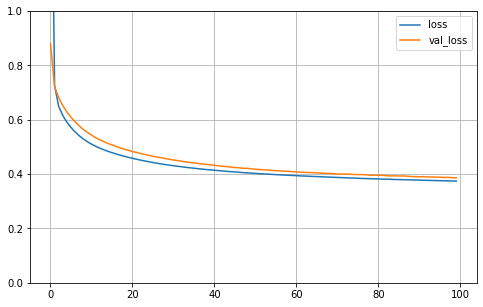

In [9]:
plot_learning_curves(history)